In [1]:
from os import walk
from os import walk
from os.path import join
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt

mypath = "."

In [2]:
def dsu_find(boss, req):
    res = boss[req]
    if res == req:
        return res
    else:
        boss[req] = dsu_find(boss, res)
        return boss[req]
    
def dsu_union(boss, reqA, reqB):
        boss[reqB] = reqA
    
def dsu(arr):
    [r, c] = arr.shape
    rt = np.zeros((r, c))
    rt = rt.astype('uint8')
    set_num = 1
    boss = [0]
    for i in range(r):
        for j in range(c):
            if arr[i][j] == 0:
                continue
            relation = []            
            if i > 0 and rt[i-1][j] != 0:
                relation.append(dsu_find(boss, rt[i-1][j]))
            if j > 0 and rt[i][j-1] != 0:
                relation.append(dsu_find(boss, rt[i][j-1]))
            if len(relation) >= 2:
                dsu_union(boss, relation[0], relation[1])
            if len(relation) == 0:
                boss.append(set_num)
                relation.append(set_num)
                set_num += 1
            rt[i][j] = relation[0]
    rt_img = np.zeros((r, c))
    rt_img = rt_img.astype('uint8')
    area = {}
    loca = []
    s = 0
    for i in range(r):
        for j in range(c):
            if rt[i][j] != 0:
                s += 1
                tar = dsu_find(boss, rt[i][j])
                try:
                    area[tar] += 1
                except:
                    area[tar] = 1
                    loca.append((i, tar))
    loca = sorted(loca)
    hand = 1
    for it in loca:
        if area[it[1]] > s* 0.1:
            hand = it[1]
            break
    for i in range(r):
        for j in range(c):
            if rt[i][j] != 0 and dsu_find(boss, rt[i][j]) == dsu_find(boss, hand):
                rt_img[i][j] = 255
    return rt_img

./b/seq_000195.png


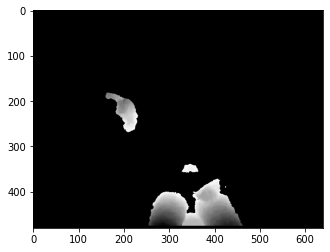

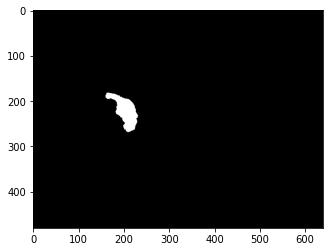

./b/seq_000205.png


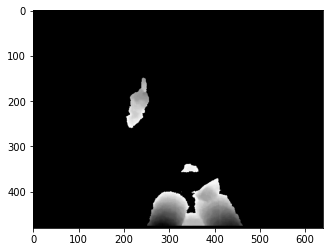

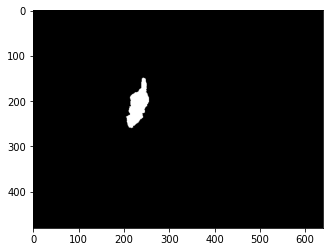

./b/seq_000120.png


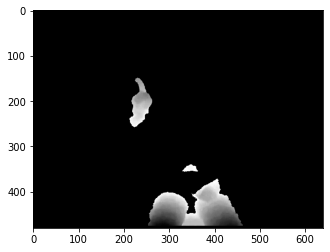

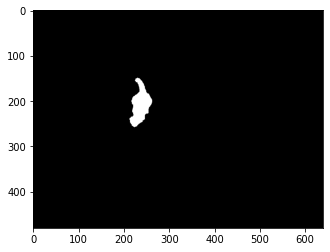

In [3]:
cnt = 3
for root, dirs, files in walk(mypath):
    try:
        os.makedirs(root+'_mask')
    except:
        pass
    for it in files:
        if cnt <= 0:
            break
        if it.find(".png") == -1:
            continue
        else:
            fullpath = join(root, it)
            print(fullpath)
            img = cv2.imread(fullpath, cv2.IMREAD_GRAYSCALE)
            show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
            plt.imshow(show_img)
            plt.show()
            res = dsu(img)
            show_img = cv2.cvtColor(res, cv2.COLOR_BGR2RGB) 
            plt.imshow(show_img)
            plt.show()
            fullpath2 = join(root+'_mask', it)
            cv2.imwrite(fullpath2, res)
            plt.show()
            cnt -= 1
            
            


